In [1]:
import pandas as pd
import numpy as np
pd.DataFrame.iteritems = pd.DataFrame.items
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("../datasets_merged/df_mergedFinal.csv")
df

,Country,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Annee_Souverainete,Nb_Univtop500,Mean_Rank_Univ,Political_Regime,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,...,Averageiqbycountry_Iqlynnbecker2019,Averageiqbycountry_Sourcelynnbecker2019,Averageiq_Ici2017Grade,Averageiq_Ici2017Score,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,Afghanistan,4.500000,574.000000,0.0,1919.0,0.0,NaN,1.0,144098.0,5853838.0,...,82.12,E,NaN,NaN,368.0,358.0,376.0,346.873954,3.303561,NaN
1,Albania,4.530769,659.500000,0.0,1912.0,0.0,NaN,1.0,48810.0,1250451.0,...,81.75,E,D+,23.4,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,Algeria,4.350000,184.000000,2.0,1962.0,0.0,NaN,1.0,250378.0,2022337.0,...,76.00,E,D,19.1,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,Andorra,4.504762,201.476190,0.0,NaN,0.0,NaN,NaN,45574.0,11132.0,...,95.20,E,NaN,NaN,NaN,NaN,NaN,41655.939232,NaN,NaN
4,Angola,4.205263,98.947368,0.0,1975.0,0.0,NaN,1.0,656434.0,668066.0,...,75.10,T,NaN,NaN,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Venezuela,4.340741,372.740741,1.0,1811.0,0.0,NaN,1.0,1324193.0,5415337.0,...,82.99,T,C-,26.8,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,Vietnam,0.000000,0.000000,1.0,1945.0,0.0,NaN,0.0,76767.0,3392025.0,...,89.53,T,C-,25.1,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,Yemen,4.280000,48.250000,1.0,1990.0,0.0,NaN,0.0,387113.0,1301166.0,...,62.86,T,NaN,NaN,NaN,NaN,NaN,641.196791,18.858729,NaN
195,Zambia,3.975000,288.250000,0.0,1964.0,0.0,NaN,1.0,187955.0,200700.0,...,68.43,E,D,18.9,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [4]:
numerical_columns = df.select_dtypes(include=['number'])
ds=numerical_columns.drop(columns=['Annee_Souverainete','Break_1','Break_2', 'Break_3', 'Break_4', 'Break_5','Political_Regime','Mean_Rank_Univ','Averageiq_Ici2017Score'])
ds

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Primary,Lower_Secondary,End_Of_The_School_Year_Break,Literacy_Rate_2021,...,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,4.500000,574.000000,0.0,0.0,144098.0,5853838.0,NaN,NaN,NaN,37.27,...,41128771.0,NaN,1.426650e+10,82.12,368.0,358.0,376.0,346.873954,3.303561,NaN
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,NaN,NaN,NaN,NaN,...,2777689.0,3.09,1.793057e+10,81.75,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,NaN,NaN,NaN,NaN,...,44903225.0,6.30,1.634724e+11,76.00,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,4.504762,201.476190,0.0,0.0,45574.0,11132.0,NaN,NaN,NaN,NaN,...,79824.0,2.58,3.325144e+09,95.20,NaN,NaN,NaN,41655.939232,NaN,NaN
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,NaN,NaN,NaN,NaN,...,35588987.0,2.30,6.650513e+10,75.10,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4.340741,372.740741,1.0,0.0,1324193.0,5415337.0,NaN,NaN,NaN,NaN,...,28301696.0,NaN,4.823593e+11,82.99,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,NaN,NaN,NaN,NaN,...,98186856.0,2.95,3.661376e+11,89.53,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,4.280000,48.250000,1.0,0.0,387113.0,1301166.0,NaN,NaN,NaN,NaN,...,33696614.0,NaN,2.160616e+10,62.86,NaN,NaN,NaN,641.196791,18.858729,NaN
195,3.975000,288.250000,0.0,0.0,187955.0,200700.0,NaN,NaN,NaN,NaN,...,20017675.0,3.11,2.209642e+10,68.43,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [5]:
#garder que les variables dont au moins 100 valeurs sont renseignées:

colonnes=list(ds.describe().columns[ds.describe().loc['count'] > 100])
colonnes

['Notes_Musees',
 'Nbvotes_Musees_Clean',
 'Nb_Prixnobel',
 'Nb_Univtop500',
 'Immigrationbycountry_Immigrants',
 'Immigrationbycountry_Emigrants',
 'Area',
 'Population',
 'Education_Spending_2021',
 'Gdp',
 'Averageiqbycountry_Iqlynnbecker2019',
 'Gdp_Percapita',
 'Indice_Evolution']

In [6]:
ds=ds[colonnes].dropna()
ds

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,81.75,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,76.00,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,75.10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,86.63,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,88.82,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,99.12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,87.59,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,89.01,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,89.53,3728.987606,47.202375


In [7]:
X = ds.drop(columns=['Averageiqbycountry_Iqlynnbecker2019'])  # Sélectionner toutes les colonnes sauf la colonne des labels
y = ds['Averageiqbycountry_Iqlynnbecker2019']  # Sélectionner uniquement la colonne des labels

In [8]:
X #TODO: one hot encoding des variables categorielles

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,3728.987606,47.202375


In [9]:
y

1      81.75
2      76.00
4      75.10
6      86.63
7      88.82
       ...  
187    99.12
189    87.59
190    89.01
193    89.53
195    68.43
Name: Averageiqbycountry_Iqlynnbecker2019, Length: 115, dtype: float64

In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'fit_intercept': [True, False]
}

# Créer une instance du modèle de régression linéaire
linear_regression = LinearRegression()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test:", mse)

Meilleurs paramètres: {'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test: 162.88807776076075


In [11]:
from sklearn.linear_model import Ridge, Lasso

# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Méthodes de résolution
}

# Créer une instance de GridSearchCV pour la régularisation Ridge
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Ridge
ridge_grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Ridge
print("Meilleurs paramètres (Ridge):", ridge_grid_search.best_params_)

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False]
}
# Créer une instance de GridSearchCV pour la régularisation Lasso
lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Lasso
lasso_grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Lasso
print("Meilleurs paramètres (Lasso):", lasso_grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Ridge
best_ridge_model = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Ridge):", ridge_mse)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Lasso
best_lasso_model = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Lasso):", lasso_mse)

Meilleurs paramètres (Ridge): {'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}
Meilleurs paramètres (Lasso): {'alpha': 1.0, 'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test (Ridge): 162.82788388057463
Erreur quadratique moyenne (MSE) sur les données de test (Lasso): 155.87023958541826


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error

# Calcul du coefficient de détermination (R²)
lasso_r2_score = r2_score(y_test, lasso_y_pred)
print("Coefficient de détermination (R²) sur les données de test (Lasso):", lasso_r2_score)

# Calcul de l'erreur absolue moyenne (MAE)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print("Erreur absolue moyenne (MAE) sur les données de test (Lasso):", lasso_mae)

# Calcul de l'erreur quadratique moyenne logarithmique (MSLE)
lasso_msle = mean_squared_log_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Lasso):", lasso_msle)

Coefficient de détermination (R²) sur les données de test (Lasso): -0.18129695295129533
Erreur absolue moyenne (MAE) sur les données de test (Lasso): 10.801245597305714
Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Lasso): 0.023001061720716573


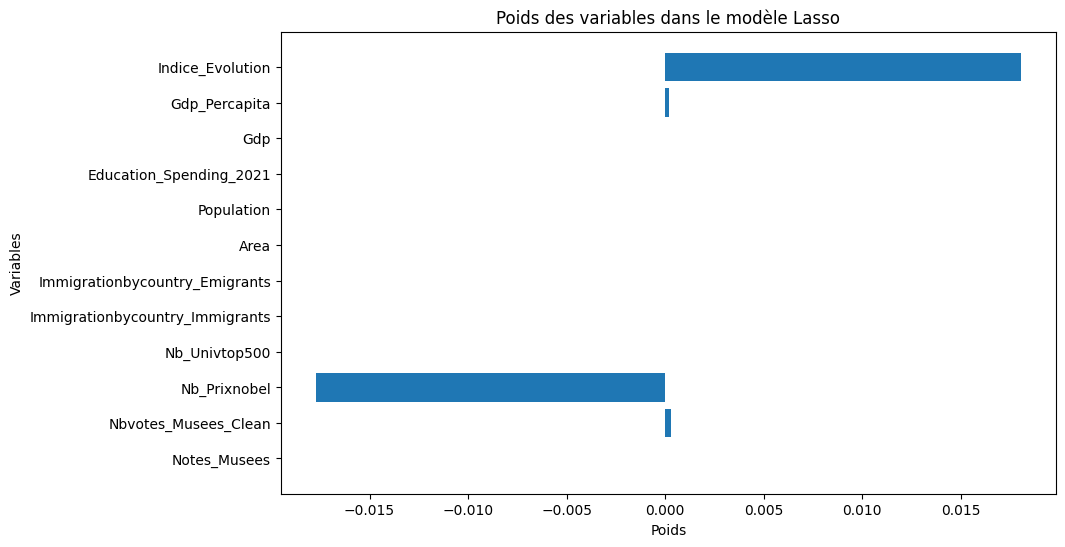

In [13]:
import matplotlib.pyplot as plt

# Récupérer les coefficients du modèle Lasso
lasso_coefficients = best_lasso_model.coef_

# Noms des variables
variables_names = list(X_test.columns)

# Créer un graphique pour visualiser les poids des variables
plt.figure(figsize=(10, 6))
plt.barh(variables_names, lasso_coefficients)
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.title('Poids des variables dans le modèle Lasso')
plt.show()


# Données normalisées

In [14]:
from sklearn.preprocessing import StandardScaler

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'fit_intercept': [True, False]
}

# Créer une instance du modèle de régression linéaire
linear_regression = LinearRegression()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test:", mse)

Meilleurs paramètres: {'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test: 162.88807785498878


In [16]:
# Définir les hyperparamètres à rechercher dans la grille
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Méthodes de résolution
}

# Créer une instance de GridSearchCV pour la régularisation Ridge
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Ridge
ridge_grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Ridge
print("Meilleurs paramètres (Ridge):", ridge_grid_search.best_params_)

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Valeurs de régularisation à tester
    'fit_intercept': [True, False]
}
# Créer une instance de GridSearchCV pour la régularisation Lasso
lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement pour la régularisation Lasso
lasso_grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés pour la régularisation Lasso
print("Meilleurs paramètres (Lasso):", lasso_grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Ridge
best_ridge_model = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Ridge):", ridge_mse)

# Évaluer le modèle avec les meilleurs paramètres sur les données de test pour la régularisation Lasso
best_lasso_model = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Erreur quadratique moyenne (MSE) sur les données de test (Lasso):", lasso_mse)

Meilleurs paramètres (Ridge): {'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}
Meilleurs paramètres (Lasso): {'alpha': 0.5, 'fit_intercept': True}
Erreur quadratique moyenne (MSE) sur les données de test (Ridge): 130.4240906576429
Erreur quadratique moyenne (MSE) sur les données de test (Lasso): 166.67086413732017


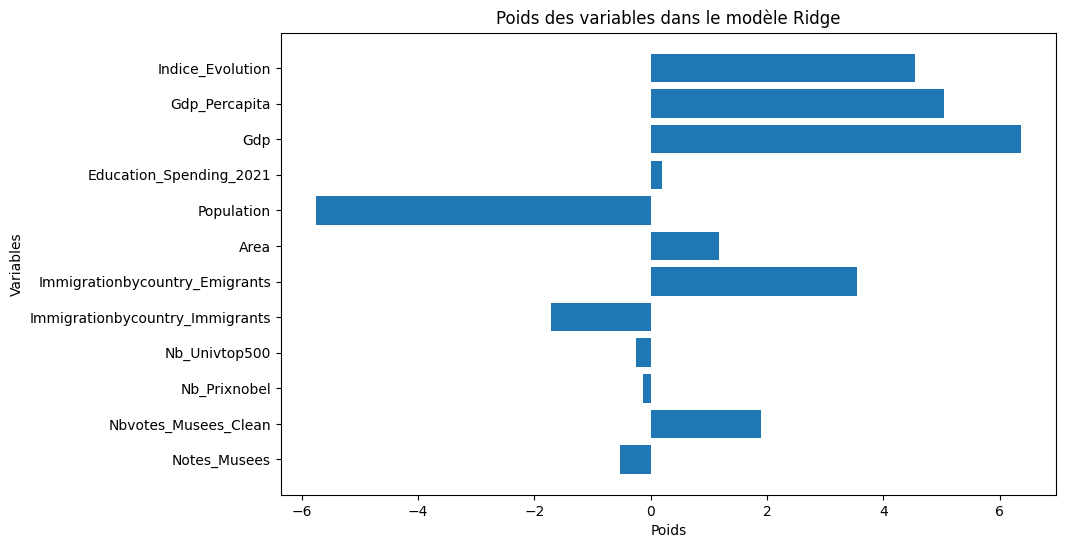

In [17]:
import matplotlib.pyplot as plt

# Récupérer les coefficients du modèle Ridge
ridge_coefficients = best_ridge_model.coef_

# Noms des variables
variables_names = list(X_test.columns)

# Créer un graphique pour visualiser les poids des variables
plt.figure(figsize=(10, 6))
plt.barh(variables_names, ridge_coefficients)
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.title('Poids des variables dans le modèle Ridge')
plt.show()


In [18]:
# Calcul du coefficient de détermination (R²)
ridge_r2_score = r2_score(y_test, ridge_y_pred)
print("Coefficient de détermination (R²) sur les données de test (Ridge):", ridge_r2_score)

# Calcul de l'erreur absolue moyenne (MAE)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print("Erreur absolue moyenne (MAE) sur les données de test (Ridge):", ridge_mae)

# Calcul de l'erreur quadratique moyenne logarithmique (MSLE)
ridge_msle = mean_squared_log_error(y_test, ridge_y_pred)
print("Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Ridge):", ridge_msle)

Coefficient de détermination (R²) sur les données de test (Ridge): 0.01155229314390327
Erreur absolue moyenne (MAE) sur les données de test (Ridge): 9.741338351482076
Erreur quadratique moyenne logarithmique (MSLE) sur les données de test (Ridge): 0.01700362607017321


# Réseaux de neurones

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Définir le nombre de couches et le nombre de neurones par couche comme des variables globales
nb_couches = 1
nb_neurones_par_couche = 5

# Créer une classe pour le modèle
class Regressor(nn.Module):
    def __init__(self, input_size):
        super(Regressor, self).__init__()
        layers = []
        for _ in range(nb_couches):
            layers.append(nn.Linear(input_size, nb_neurones_par_couche))
            layers.append(nn.ReLU(inplace=True))
            input_size = nb_neurones_par_couche
        layers.append(nn.Linear(input_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Créer une instance du modèle
input_size = len(X_train_scaled[0])
model = Regressor(input_size)

# Définir la fonction de perte et l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convertir les données en tensors PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(list(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(list(y_test), dtype=torch.float32)

# Créer des DataLoader pour gérer les données
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Entraîner le modèle
num_epochs = 10000
losses=[]
test_losses=[]
for epoch in range(num_epochs):
    i=0
    losses_avg=0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        i+=1
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))  
        losses_avg+=loss.item()
        loss.backward()  
        optimizer.step() 
    losses.append(losses_avg/i)
    
    # Évaluation sur les données de test après chaque époque
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_losses.append(test_loss)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

Epoch [1/10000], Test Loss: 8007.6289
Epoch [2/10000], Test Loss: 8004.6406
Epoch [3/10000], Test Loss: 8001.6851
Epoch [4/10000], Test Loss: 7998.7734
Epoch [5/10000], Test Loss: 7995.9224
Epoch [6/10000], Test Loss: 7992.9258
Epoch [7/10000], Test Loss: 7989.7090
Epoch [8/10000], Test Loss: 7986.4019
Epoch [9/10000], Test Loss: 7983.0620
Epoch [10/10000], Test Loss: 7979.8789
Epoch [11/10000], Test Loss: 7976.7246
Epoch [12/10000], Test Loss: 7973.5474
Epoch [13/10000], Test Loss: 7970.2319
Epoch [14/10000], Test Loss: 7966.5474
Epoch [15/10000], Test Loss: 7962.8984
Epoch [16/10000], Test Loss: 7959.1641
Epoch [17/10000], Test Loss: 7955.3696
Epoch [18/10000], Test Loss: 7951.4609
Epoch [19/10000], Test Loss: 7947.5757
Epoch [20/10000], Test Loss: 7943.7539
Epoch [21/10000], Test Loss: 7939.9878
Epoch [22/10000], Test Loss: 7936.1719
Epoch [23/10000], Test Loss: 7932.3198
Epoch [24/10000], Test Loss: 7928.3218
Epoch [25/10000], Test Loss: 7924.1992
Epoch [26/10000], Test Loss: 7920.

Epoch [238/10000], Test Loss: 4717.8984
Epoch [239/10000], Test Loss: 4696.1196
Epoch [240/10000], Test Loss: 4674.1821
Epoch [241/10000], Test Loss: 4652.2148
Epoch [242/10000], Test Loss: 4630.1333
Epoch [243/10000], Test Loss: 4608.4629
Epoch [244/10000], Test Loss: 4586.5366
Epoch [245/10000], Test Loss: 4565.2231
Epoch [246/10000], Test Loss: 4543.8062
Epoch [247/10000], Test Loss: 4521.9565
Epoch [248/10000], Test Loss: 4500.4019
Epoch [249/10000], Test Loss: 4478.8320
Epoch [250/10000], Test Loss: 4457.1904
Epoch [251/10000], Test Loss: 4436.0083
Epoch [252/10000], Test Loss: 4414.6841
Epoch [253/10000], Test Loss: 4392.6699
Epoch [254/10000], Test Loss: 4370.5674
Epoch [255/10000], Test Loss: 4348.2603
Epoch [256/10000], Test Loss: 4326.8071
Epoch [257/10000], Test Loss: 4304.7593
Epoch [258/10000], Test Loss: 4283.0962
Epoch [259/10000], Test Loss: 4261.4067
Epoch [260/10000], Test Loss: 4239.5981
Epoch [261/10000], Test Loss: 4218.3237
Epoch [262/10000], Test Loss: 4197.5132


Epoch [468/10000], Test Loss: 1282.9283
Epoch [469/10000], Test Loss: 1276.7008
Epoch [470/10000], Test Loss: 1270.7476
Epoch [471/10000], Test Loss: 1264.7430
Epoch [472/10000], Test Loss: 1258.9542
Epoch [473/10000], Test Loss: 1253.0465
Epoch [474/10000], Test Loss: 1247.3156
Epoch [475/10000], Test Loss: 1241.9926
Epoch [476/10000], Test Loss: 1236.5568
Epoch [477/10000], Test Loss: 1231.1583
Epoch [478/10000], Test Loss: 1226.0955
Epoch [479/10000], Test Loss: 1221.4586
Epoch [480/10000], Test Loss: 1216.6951
Epoch [481/10000], Test Loss: 1212.1144
Epoch [482/10000], Test Loss: 1207.3043
Epoch [483/10000], Test Loss: 1202.3334
Epoch [484/10000], Test Loss: 1197.6324
Epoch [485/10000], Test Loss: 1193.0826
Epoch [486/10000], Test Loss: 1188.6033
Epoch [487/10000], Test Loss: 1184.3995
Epoch [488/10000], Test Loss: 1180.0951
Epoch [489/10000], Test Loss: 1175.6046
Epoch [490/10000], Test Loss: 1171.2189
Epoch [491/10000], Test Loss: 1167.0643
Epoch [492/10000], Test Loss: 1162.9344


Epoch [720/10000], Test Loss: 899.6430
Epoch [721/10000], Test Loss: 899.6199
Epoch [722/10000], Test Loss: 899.9708
Epoch [723/10000], Test Loss: 900.2441
Epoch [724/10000], Test Loss: 900.0166
Epoch [725/10000], Test Loss: 899.1783
Epoch [726/10000], Test Loss: 899.2093
Epoch [727/10000], Test Loss: 899.4722
Epoch [728/10000], Test Loss: 899.5701
Epoch [729/10000], Test Loss: 899.6389
Epoch [730/10000], Test Loss: 899.6421
Epoch [731/10000], Test Loss: 899.2139
Epoch [732/10000], Test Loss: 898.9683
Epoch [733/10000], Test Loss: 899.3015
Epoch [734/10000], Test Loss: 899.5497
Epoch [735/10000], Test Loss: 900.1004
Epoch [736/10000], Test Loss: 900.9631
Epoch [737/10000], Test Loss: 901.8348
Epoch [738/10000], Test Loss: 902.4670
Epoch [739/10000], Test Loss: 902.5737
Epoch [740/10000], Test Loss: 902.4270
Epoch [741/10000], Test Loss: 902.1224
Epoch [742/10000], Test Loss: 902.0080
Epoch [743/10000], Test Loss: 901.6092
Epoch [744/10000], Test Loss: 901.1436
Epoch [745/10000], Test L

Epoch [931/10000], Test Loss: 1002.2905
Epoch [932/10000], Test Loss: 1003.0118
Epoch [933/10000], Test Loss: 1003.9304
Epoch [934/10000], Test Loss: 1004.9831
Epoch [935/10000], Test Loss: 1006.3688
Epoch [936/10000], Test Loss: 1007.7769
Epoch [937/10000], Test Loss: 1009.7935
Epoch [938/10000], Test Loss: 1010.2725
Epoch [939/10000], Test Loss: 1010.4468
Epoch [940/10000], Test Loss: 1011.8842
Epoch [941/10000], Test Loss: 1012.8130
Epoch [942/10000], Test Loss: 1013.3362
Epoch [943/10000], Test Loss: 1014.0323
Epoch [944/10000], Test Loss: 1014.9834
Epoch [945/10000], Test Loss: 1016.3164
Epoch [946/10000], Test Loss: 1016.9058
Epoch [947/10000], Test Loss: 1016.3086
Epoch [948/10000], Test Loss: 1015.3912
Epoch [949/10000], Test Loss: 1014.7922
Epoch [950/10000], Test Loss: 1014.5993
Epoch [951/10000], Test Loss: 1015.3398
Epoch [952/10000], Test Loss: 1016.3849
Epoch [953/10000], Test Loss: 1017.5591
Epoch [954/10000], Test Loss: 1018.7311
Epoch [955/10000], Test Loss: 1019.3486


Epoch [1186/10000], Test Loss: 948.1641
Epoch [1187/10000], Test Loss: 947.8745
Epoch [1188/10000], Test Loss: 946.9040
Epoch [1189/10000], Test Loss: 945.6799
Epoch [1190/10000], Test Loss: 944.1651
Epoch [1191/10000], Test Loss: 942.6704
Epoch [1192/10000], Test Loss: 940.9756
Epoch [1193/10000], Test Loss: 940.1658
Epoch [1194/10000], Test Loss: 939.5762
Epoch [1195/10000], Test Loss: 937.8168
Epoch [1196/10000], Test Loss: 936.8669
Epoch [1197/10000], Test Loss: 936.2311
Epoch [1198/10000], Test Loss: 934.8344
Epoch [1199/10000], Test Loss: 934.2464
Epoch [1200/10000], Test Loss: 934.0268
Epoch [1201/10000], Test Loss: 932.8896
Epoch [1202/10000], Test Loss: 931.5090
Epoch [1203/10000], Test Loss: 931.3403
Epoch [1204/10000], Test Loss: 930.6861
Epoch [1205/10000], Test Loss: 929.6508
Epoch [1206/10000], Test Loss: 928.8477
Epoch [1207/10000], Test Loss: 927.5759
Epoch [1208/10000], Test Loss: 926.5269
Epoch [1209/10000], Test Loss: 926.0446
Epoch [1210/10000], Test Loss: 925.9699


Epoch [1416/10000], Test Loss: 663.7051
Epoch [1417/10000], Test Loss: 662.9694
Epoch [1418/10000], Test Loss: 662.5848
Epoch [1419/10000], Test Loss: 662.6782
Epoch [1420/10000], Test Loss: 662.2918
Epoch [1421/10000], Test Loss: 661.7941
Epoch [1422/10000], Test Loss: 661.1446
Epoch [1423/10000], Test Loss: 660.6855
Epoch [1424/10000], Test Loss: 659.2231
Epoch [1425/10000], Test Loss: 658.2431
Epoch [1426/10000], Test Loss: 658.0472
Epoch [1427/10000], Test Loss: 658.1797
Epoch [1428/10000], Test Loss: 658.0994
Epoch [1429/10000], Test Loss: 656.1768
Epoch [1430/10000], Test Loss: 654.7167
Epoch [1431/10000], Test Loss: 653.5715
Epoch [1432/10000], Test Loss: 652.0572
Epoch [1433/10000], Test Loss: 650.9125
Epoch [1434/10000], Test Loss: 649.9794
Epoch [1435/10000], Test Loss: 648.9153
Epoch [1436/10000], Test Loss: 648.0121
Epoch [1437/10000], Test Loss: 648.2520
Epoch [1438/10000], Test Loss: 648.2418
Epoch [1439/10000], Test Loss: 648.7773
Epoch [1440/10000], Test Loss: 648.9341


Epoch [1658/10000], Test Loss: 516.5380
Epoch [1659/10000], Test Loss: 516.3133
Epoch [1660/10000], Test Loss: 516.5273
Epoch [1661/10000], Test Loss: 515.7756
Epoch [1662/10000], Test Loss: 515.5455
Epoch [1663/10000], Test Loss: 514.8249
Epoch [1664/10000], Test Loss: 513.7779
Epoch [1665/10000], Test Loss: 512.3239
Epoch [1666/10000], Test Loss: 511.4966
Epoch [1667/10000], Test Loss: 511.5255
Epoch [1668/10000], Test Loss: 512.1253
Epoch [1669/10000], Test Loss: 512.6682
Epoch [1670/10000], Test Loss: 512.5206
Epoch [1671/10000], Test Loss: 511.7277
Epoch [1672/10000], Test Loss: 511.3570
Epoch [1673/10000], Test Loss: 511.4260
Epoch [1674/10000], Test Loss: 511.6291
Epoch [1675/10000], Test Loss: 512.8111
Epoch [1676/10000], Test Loss: 513.5438
Epoch [1677/10000], Test Loss: 513.6022
Epoch [1678/10000], Test Loss: 513.3892
Epoch [1679/10000], Test Loss: 513.4298
Epoch [1680/10000], Test Loss: 512.5870
Epoch [1681/10000], Test Loss: 512.4046
Epoch [1682/10000], Test Loss: 512.6328


Epoch [1868/10000], Test Loss: 470.9362
Epoch [1869/10000], Test Loss: 471.0587
Epoch [1870/10000], Test Loss: 471.4975
Epoch [1871/10000], Test Loss: 472.2296
Epoch [1872/10000], Test Loss: 471.9180
Epoch [1873/10000], Test Loss: 470.8184
Epoch [1874/10000], Test Loss: 469.9373
Epoch [1875/10000], Test Loss: 469.8421
Epoch [1876/10000], Test Loss: 469.3553
Epoch [1877/10000], Test Loss: 468.7728
Epoch [1878/10000], Test Loss: 468.3659
Epoch [1879/10000], Test Loss: 467.7119
Epoch [1880/10000], Test Loss: 467.4343
Epoch [1881/10000], Test Loss: 467.9714
Epoch [1882/10000], Test Loss: 468.5422
Epoch [1883/10000], Test Loss: 469.8300
Epoch [1884/10000], Test Loss: 469.8461
Epoch [1885/10000], Test Loss: 470.1824
Epoch [1886/10000], Test Loss: 469.9449
Epoch [1887/10000], Test Loss: 469.2555
Epoch [1888/10000], Test Loss: 468.2150
Epoch [1889/10000], Test Loss: 468.1071
Epoch [1890/10000], Test Loss: 467.7251
Epoch [1891/10000], Test Loss: 467.9276
Epoch [1892/10000], Test Loss: 467.7594


Epoch [2095/10000], Test Loss: 436.9469
Epoch [2096/10000], Test Loss: 438.3893
Epoch [2097/10000], Test Loss: 440.2622
Epoch [2098/10000], Test Loss: 441.5211
Epoch [2099/10000], Test Loss: 442.5442
Epoch [2100/10000], Test Loss: 442.3642
Epoch [2101/10000], Test Loss: 442.1790
Epoch [2102/10000], Test Loss: 441.3047
Epoch [2103/10000], Test Loss: 439.8975
Epoch [2104/10000], Test Loss: 439.3951
Epoch [2105/10000], Test Loss: 439.7307
Epoch [2106/10000], Test Loss: 439.5290
Epoch [2107/10000], Test Loss: 438.6577
Epoch [2108/10000], Test Loss: 438.8036
Epoch [2109/10000], Test Loss: 438.9260
Epoch [2110/10000], Test Loss: 439.3495
Epoch [2111/10000], Test Loss: 439.4542
Epoch [2112/10000], Test Loss: 440.0796
Epoch [2113/10000], Test Loss: 441.2961
Epoch [2114/10000], Test Loss: 441.6111
Epoch [2115/10000], Test Loss: 441.5799
Epoch [2116/10000], Test Loss: 442.5236
Epoch [2117/10000], Test Loss: 443.5127
Epoch [2118/10000], Test Loss: 444.2845
Epoch [2119/10000], Test Loss: 444.1555


Epoch [2325/10000], Test Loss: 441.3817
Epoch [2326/10000], Test Loss: 441.9593
Epoch [2327/10000], Test Loss: 442.5463
Epoch [2328/10000], Test Loss: 443.3161
Epoch [2329/10000], Test Loss: 442.4028
Epoch [2330/10000], Test Loss: 441.4251
Epoch [2331/10000], Test Loss: 441.4391
Epoch [2332/10000], Test Loss: 441.7885
Epoch [2333/10000], Test Loss: 441.3939
Epoch [2334/10000], Test Loss: 439.8015
Epoch [2335/10000], Test Loss: 438.6497
Epoch [2336/10000], Test Loss: 438.0442
Epoch [2337/10000], Test Loss: 437.2417
Epoch [2338/10000], Test Loss: 435.7885
Epoch [2339/10000], Test Loss: 435.4050
Epoch [2340/10000], Test Loss: 435.5552
Epoch [2341/10000], Test Loss: 435.5741
Epoch [2342/10000], Test Loss: 435.0643
Epoch [2343/10000], Test Loss: 433.6974
Epoch [2344/10000], Test Loss: 433.1661
Epoch [2345/10000], Test Loss: 432.6670
Epoch [2346/10000], Test Loss: 431.3661
Epoch [2347/10000], Test Loss: 431.0574
Epoch [2348/10000], Test Loss: 431.7885
Epoch [2349/10000], Test Loss: 433.4362


Epoch [2569/10000], Test Loss: 429.1875
Epoch [2570/10000], Test Loss: 430.2002
Epoch [2571/10000], Test Loss: 431.1539
Epoch [2572/10000], Test Loss: 432.3417
Epoch [2573/10000], Test Loss: 432.9540
Epoch [2574/10000], Test Loss: 432.2199
Epoch [2575/10000], Test Loss: 430.3604
Epoch [2576/10000], Test Loss: 428.8543
Epoch [2577/10000], Test Loss: 429.3673
Epoch [2578/10000], Test Loss: 429.2908
Epoch [2579/10000], Test Loss: 429.4557
Epoch [2580/10000], Test Loss: 429.5735
Epoch [2581/10000], Test Loss: 429.8026
Epoch [2582/10000], Test Loss: 428.8918
Epoch [2583/10000], Test Loss: 428.8123
Epoch [2584/10000], Test Loss: 428.0573
Epoch [2585/10000], Test Loss: 427.5735
Epoch [2586/10000], Test Loss: 428.1417
Epoch [2587/10000], Test Loss: 428.8258
Epoch [2588/10000], Test Loss: 430.2600
Epoch [2589/10000], Test Loss: 432.3416
Epoch [2590/10000], Test Loss: 434.8489
Epoch [2591/10000], Test Loss: 435.4723
Epoch [2592/10000], Test Loss: 435.1018
Epoch [2593/10000], Test Loss: 433.8209


Epoch [2802/10000], Test Loss: 421.0004
Epoch [2803/10000], Test Loss: 419.3700
Epoch [2804/10000], Test Loss: 418.9135
Epoch [2805/10000], Test Loss: 418.8590
Epoch [2806/10000], Test Loss: 418.8155
Epoch [2807/10000], Test Loss: 418.5233
Epoch [2808/10000], Test Loss: 419.3170
Epoch [2809/10000], Test Loss: 420.0746
Epoch [2810/10000], Test Loss: 420.8606
Epoch [2811/10000], Test Loss: 421.4422
Epoch [2812/10000], Test Loss: 421.3143
Epoch [2813/10000], Test Loss: 420.8597
Epoch [2814/10000], Test Loss: 421.0552
Epoch [2815/10000], Test Loss: 420.3284
Epoch [2816/10000], Test Loss: 418.9832
Epoch [2817/10000], Test Loss: 417.5929
Epoch [2818/10000], Test Loss: 416.8089
Epoch [2819/10000], Test Loss: 416.2869
Epoch [2820/10000], Test Loss: 415.8710
Epoch [2821/10000], Test Loss: 416.8593
Epoch [2822/10000], Test Loss: 418.0164
Epoch [2823/10000], Test Loss: 418.1372
Epoch [2824/10000], Test Loss: 417.8990
Epoch [2825/10000], Test Loss: 416.5172
Epoch [2826/10000], Test Loss: 416.1319


Epoch [3013/10000], Test Loss: 401.7238
Epoch [3014/10000], Test Loss: 401.4497
Epoch [3015/10000], Test Loss: 399.8576
Epoch [3016/10000], Test Loss: 399.0390
Epoch [3017/10000], Test Loss: 398.4577
Epoch [3018/10000], Test Loss: 399.3704
Epoch [3019/10000], Test Loss: 400.0697
Epoch [3020/10000], Test Loss: 399.5103
Epoch [3021/10000], Test Loss: 398.1128
Epoch [3022/10000], Test Loss: 396.7195
Epoch [3023/10000], Test Loss: 395.4174
Epoch [3024/10000], Test Loss: 395.5543
Epoch [3025/10000], Test Loss: 395.3181
Epoch [3026/10000], Test Loss: 394.5565
Epoch [3027/10000], Test Loss: 394.9088
Epoch [3028/10000], Test Loss: 395.2041
Epoch [3029/10000], Test Loss: 394.4756
Epoch [3030/10000], Test Loss: 393.8236
Epoch [3031/10000], Test Loss: 393.1681
Epoch [3032/10000], Test Loss: 393.3410
Epoch [3033/10000], Test Loss: 394.6884
Epoch [3034/10000], Test Loss: 398.0401
Epoch [3035/10000], Test Loss: 400.0231
Epoch [3036/10000], Test Loss: 401.7102
Epoch [3037/10000], Test Loss: 402.3716


Epoch [3248/10000], Test Loss: 377.7767
Epoch [3249/10000], Test Loss: 378.7396
Epoch [3250/10000], Test Loss: 379.4657
Epoch [3251/10000], Test Loss: 378.9057
Epoch [3252/10000], Test Loss: 378.6463
Epoch [3253/10000], Test Loss: 378.9170
Epoch [3254/10000], Test Loss: 379.8518
Epoch [3255/10000], Test Loss: 380.1989
Epoch [3256/10000], Test Loss: 380.0623
Epoch [3257/10000], Test Loss: 379.4313
Epoch [3258/10000], Test Loss: 378.4572
Epoch [3259/10000], Test Loss: 376.9514
Epoch [3260/10000], Test Loss: 375.9932
Epoch [3261/10000], Test Loss: 376.4462
Epoch [3262/10000], Test Loss: 376.8039
Epoch [3263/10000], Test Loss: 378.9560
Epoch [3264/10000], Test Loss: 380.7890
Epoch [3265/10000], Test Loss: 382.0434
Epoch [3266/10000], Test Loss: 381.3320
Epoch [3267/10000], Test Loss: 381.5325
Epoch [3268/10000], Test Loss: 381.5746
Epoch [3269/10000], Test Loss: 380.2086
Epoch [3270/10000], Test Loss: 378.1507
Epoch [3271/10000], Test Loss: 375.0654
Epoch [3272/10000], Test Loss: 372.6574


Epoch [3473/10000], Test Loss: 361.3613
Epoch [3474/10000], Test Loss: 360.2890
Epoch [3475/10000], Test Loss: 359.2167
Epoch [3476/10000], Test Loss: 358.9083
Epoch [3477/10000], Test Loss: 359.3468
Epoch [3478/10000], Test Loss: 359.8230
Epoch [3479/10000], Test Loss: 360.5413
Epoch [3480/10000], Test Loss: 361.9611
Epoch [3481/10000], Test Loss: 363.1821
Epoch [3482/10000], Test Loss: 364.0185
Epoch [3483/10000], Test Loss: 363.7821
Epoch [3484/10000], Test Loss: 363.9023
Epoch [3485/10000], Test Loss: 364.1104
Epoch [3486/10000], Test Loss: 363.9358
Epoch [3487/10000], Test Loss: 364.3542
Epoch [3488/10000], Test Loss: 365.4248
Epoch [3489/10000], Test Loss: 366.8181
Epoch [3490/10000], Test Loss: 367.8988
Epoch [3491/10000], Test Loss: 367.5752
Epoch [3492/10000], Test Loss: 368.2906
Epoch [3493/10000], Test Loss: 370.1248
Epoch [3494/10000], Test Loss: 371.3178
Epoch [3495/10000], Test Loss: 371.7719
Epoch [3496/10000], Test Loss: 370.3291
Epoch [3497/10000], Test Loss: 369.5735


Epoch [3708/10000], Test Loss: 361.9179
Epoch [3709/10000], Test Loss: 361.7730
Epoch [3710/10000], Test Loss: 361.8518
Epoch [3711/10000], Test Loss: 361.7664
Epoch [3712/10000], Test Loss: 360.3405
Epoch [3713/10000], Test Loss: 359.2014
Epoch [3714/10000], Test Loss: 357.7447
Epoch [3715/10000], Test Loss: 356.4669
Epoch [3716/10000], Test Loss: 356.0493
Epoch [3717/10000], Test Loss: 355.0672
Epoch [3718/10000], Test Loss: 355.2614
Epoch [3719/10000], Test Loss: 355.6647
Epoch [3720/10000], Test Loss: 355.5834
Epoch [3721/10000], Test Loss: 355.2197
Epoch [3722/10000], Test Loss: 355.9443
Epoch [3723/10000], Test Loss: 355.5767
Epoch [3724/10000], Test Loss: 354.6578
Epoch [3725/10000], Test Loss: 353.7697
Epoch [3726/10000], Test Loss: 352.7294
Epoch [3727/10000], Test Loss: 351.4442
Epoch [3728/10000], Test Loss: 351.0103
Epoch [3729/10000], Test Loss: 350.9554
Epoch [3730/10000], Test Loss: 351.3014
Epoch [3731/10000], Test Loss: 351.7233
Epoch [3732/10000], Test Loss: 351.4646


Epoch [3916/10000], Test Loss: 370.4893
Epoch [3917/10000], Test Loss: 372.6642
Epoch [3918/10000], Test Loss: 373.9818
Epoch [3919/10000], Test Loss: 374.6046
Epoch [3920/10000], Test Loss: 373.1175
Epoch [3921/10000], Test Loss: 373.0282
Epoch [3922/10000], Test Loss: 373.2036
Epoch [3923/10000], Test Loss: 373.5605
Epoch [3924/10000], Test Loss: 373.7024
Epoch [3925/10000], Test Loss: 374.4834
Epoch [3926/10000], Test Loss: 373.9806
Epoch [3927/10000], Test Loss: 374.3925
Epoch [3928/10000], Test Loss: 374.9342
Epoch [3929/10000], Test Loss: 374.6452
Epoch [3930/10000], Test Loss: 374.3109
Epoch [3931/10000], Test Loss: 373.4532
Epoch [3932/10000], Test Loss: 372.0724
Epoch [3933/10000], Test Loss: 371.3092
Epoch [3934/10000], Test Loss: 370.9091
Epoch [3935/10000], Test Loss: 369.6313
Epoch [3936/10000], Test Loss: 369.2932
Epoch [3937/10000], Test Loss: 367.8306
Epoch [3938/10000], Test Loss: 365.5890
Epoch [3939/10000], Test Loss: 364.9826
Epoch [3940/10000], Test Loss: 364.1058


Epoch [4144/10000], Test Loss: 366.2238
Epoch [4145/10000], Test Loss: 366.3156
Epoch [4146/10000], Test Loss: 366.6327
Epoch [4147/10000], Test Loss: 365.9327
Epoch [4148/10000], Test Loss: 365.8322
Epoch [4149/10000], Test Loss: 365.4907
Epoch [4150/10000], Test Loss: 365.4509
Epoch [4151/10000], Test Loss: 365.4201
Epoch [4152/10000], Test Loss: 364.6167
Epoch [4153/10000], Test Loss: 364.4043
Epoch [4154/10000], Test Loss: 364.2843
Epoch [4155/10000], Test Loss: 364.4349
Epoch [4156/10000], Test Loss: 364.9926
Epoch [4157/10000], Test Loss: 364.1401
Epoch [4158/10000], Test Loss: 364.1819
Epoch [4159/10000], Test Loss: 364.1477
Epoch [4160/10000], Test Loss: 363.3537
Epoch [4161/10000], Test Loss: 362.8466
Epoch [4162/10000], Test Loss: 363.2860
Epoch [4163/10000], Test Loss: 363.1754
Epoch [4164/10000], Test Loss: 363.5486
Epoch [4165/10000], Test Loss: 364.4316
Epoch [4166/10000], Test Loss: 365.5130
Epoch [4167/10000], Test Loss: 366.8226
Epoch [4168/10000], Test Loss: 368.2854


Epoch [4403/10000], Test Loss: 393.5610
Epoch [4404/10000], Test Loss: 395.2828
Epoch [4405/10000], Test Loss: 396.0028
Epoch [4406/10000], Test Loss: 396.8762
Epoch [4407/10000], Test Loss: 397.7427
Epoch [4408/10000], Test Loss: 398.9103
Epoch [4409/10000], Test Loss: 398.7477
Epoch [4410/10000], Test Loss: 398.0816
Epoch [4411/10000], Test Loss: 397.6835
Epoch [4412/10000], Test Loss: 396.8212
Epoch [4413/10000], Test Loss: 396.4878
Epoch [4414/10000], Test Loss: 397.6609
Epoch [4415/10000], Test Loss: 398.3994
Epoch [4416/10000], Test Loss: 399.3448
Epoch [4417/10000], Test Loss: 399.4489
Epoch [4418/10000], Test Loss: 399.8652
Epoch [4419/10000], Test Loss: 400.7407
Epoch [4420/10000], Test Loss: 401.2470
Epoch [4421/10000], Test Loss: 401.1802
Epoch [4422/10000], Test Loss: 400.6383
Epoch [4423/10000], Test Loss: 399.3763
Epoch [4424/10000], Test Loss: 398.0314
Epoch [4425/10000], Test Loss: 397.6765
Epoch [4426/10000], Test Loss: 396.4200
Epoch [4427/10000], Test Loss: 394.9454


Epoch [4634/10000], Test Loss: 423.8263
Epoch [4635/10000], Test Loss: 424.1041
Epoch [4636/10000], Test Loss: 423.7228
Epoch [4637/10000], Test Loss: 422.8929
Epoch [4638/10000], Test Loss: 422.1791
Epoch [4639/10000], Test Loss: 421.4098
Epoch [4640/10000], Test Loss: 421.0004
Epoch [4641/10000], Test Loss: 420.0713
Epoch [4642/10000], Test Loss: 419.4978
Epoch [4643/10000], Test Loss: 419.6519
Epoch [4644/10000], Test Loss: 420.3147
Epoch [4645/10000], Test Loss: 421.5161
Epoch [4646/10000], Test Loss: 423.0754
Epoch [4647/10000], Test Loss: 424.1815
Epoch [4648/10000], Test Loss: 424.7234
Epoch [4649/10000], Test Loss: 424.9583
Epoch [4650/10000], Test Loss: 425.4963
Epoch [4651/10000], Test Loss: 425.4618
Epoch [4652/10000], Test Loss: 425.3980
Epoch [4653/10000], Test Loss: 424.5331
Epoch [4654/10000], Test Loss: 424.0350
Epoch [4655/10000], Test Loss: 424.4792
Epoch [4656/10000], Test Loss: 424.8889
Epoch [4657/10000], Test Loss: 425.9366
Epoch [4658/10000], Test Loss: 427.7611


Epoch [4842/10000], Test Loss: 438.6147
Epoch [4843/10000], Test Loss: 437.0113
Epoch [4844/10000], Test Loss: 436.0338
Epoch [4845/10000], Test Loss: 435.3700
Epoch [4846/10000], Test Loss: 434.3488
Epoch [4847/10000], Test Loss: 433.7343
Epoch [4848/10000], Test Loss: 434.2133
Epoch [4849/10000], Test Loss: 435.2144
Epoch [4850/10000], Test Loss: 435.9423
Epoch [4851/10000], Test Loss: 436.8033
Epoch [4852/10000], Test Loss: 437.2201
Epoch [4853/10000], Test Loss: 438.4951
Epoch [4854/10000], Test Loss: 440.3657
Epoch [4855/10000], Test Loss: 441.5890
Epoch [4856/10000], Test Loss: 442.0446
Epoch [4857/10000], Test Loss: 442.8465
Epoch [4858/10000], Test Loss: 443.4472
Epoch [4859/10000], Test Loss: 443.8133
Epoch [4860/10000], Test Loss: 443.7512
Epoch [4861/10000], Test Loss: 442.8673
Epoch [4862/10000], Test Loss: 442.2439
Epoch [4863/10000], Test Loss: 441.6295
Epoch [4864/10000], Test Loss: 441.2263
Epoch [4865/10000], Test Loss: 441.2100
Epoch [4866/10000], Test Loss: 441.6322


Epoch [5075/10000], Test Loss: 460.2607
Epoch [5076/10000], Test Loss: 460.4337
Epoch [5077/10000], Test Loss: 461.0101
Epoch [5078/10000], Test Loss: 461.2311
Epoch [5079/10000], Test Loss: 462.1316
Epoch [5080/10000], Test Loss: 462.7541
Epoch [5081/10000], Test Loss: 462.1898
Epoch [5082/10000], Test Loss: 462.3866
Epoch [5083/10000], Test Loss: 462.5443
Epoch [5084/10000], Test Loss: 462.2509
Epoch [5085/10000], Test Loss: 461.4473
Epoch [5086/10000], Test Loss: 460.8973
Epoch [5087/10000], Test Loss: 461.1309
Epoch [5088/10000], Test Loss: 461.3551
Epoch [5089/10000], Test Loss: 462.2965
Epoch [5090/10000], Test Loss: 463.0958
Epoch [5091/10000], Test Loss: 462.7812
Epoch [5092/10000], Test Loss: 462.1287
Epoch [5093/10000], Test Loss: 460.9654
Epoch [5094/10000], Test Loss: 459.9312
Epoch [5095/10000], Test Loss: 459.3671
Epoch [5096/10000], Test Loss: 458.1961
Epoch [5097/10000], Test Loss: 456.8993
Epoch [5098/10000], Test Loss: 457.1620
Epoch [5099/10000], Test Loss: 456.6457


Epoch [5293/10000], Test Loss: 459.7335
Epoch [5294/10000], Test Loss: 458.6569
Epoch [5295/10000], Test Loss: 458.3035
Epoch [5296/10000], Test Loss: 458.5185
Epoch [5297/10000], Test Loss: 459.2035
Epoch [5298/10000], Test Loss: 459.4875
Epoch [5299/10000], Test Loss: 459.8058
Epoch [5300/10000], Test Loss: 460.0732
Epoch [5301/10000], Test Loss: 461.0818
Epoch [5302/10000], Test Loss: 461.7612
Epoch [5303/10000], Test Loss: 461.5283
Epoch [5304/10000], Test Loss: 461.2849
Epoch [5305/10000], Test Loss: 460.7343
Epoch [5306/10000], Test Loss: 460.4348
Epoch [5307/10000], Test Loss: 459.9642
Epoch [5308/10000], Test Loss: 458.9955
Epoch [5309/10000], Test Loss: 458.2386
Epoch [5310/10000], Test Loss: 458.3442
Epoch [5311/10000], Test Loss: 459.1862
Epoch [5312/10000], Test Loss: 459.6384
Epoch [5313/10000], Test Loss: 460.1741
Epoch [5314/10000], Test Loss: 461.6968
Epoch [5315/10000], Test Loss: 463.3932
Epoch [5316/10000], Test Loss: 465.0576
Epoch [5317/10000], Test Loss: 465.9964


Epoch [5516/10000], Test Loss: 475.5547
Epoch [5517/10000], Test Loss: 474.6026
Epoch [5518/10000], Test Loss: 475.1555
Epoch [5519/10000], Test Loss: 475.6551
Epoch [5520/10000], Test Loss: 476.3395
Epoch [5521/10000], Test Loss: 477.6325
Epoch [5522/10000], Test Loss: 478.2086
Epoch [5523/10000], Test Loss: 478.4771
Epoch [5524/10000], Test Loss: 478.8366
Epoch [5525/10000], Test Loss: 479.9183
Epoch [5526/10000], Test Loss: 479.9700
Epoch [5527/10000], Test Loss: 480.3280
Epoch [5528/10000], Test Loss: 480.9841
Epoch [5529/10000], Test Loss: 482.0307
Epoch [5530/10000], Test Loss: 482.7904
Epoch [5531/10000], Test Loss: 483.7661
Epoch [5532/10000], Test Loss: 484.3725
Epoch [5533/10000], Test Loss: 485.0454
Epoch [5534/10000], Test Loss: 485.3084
Epoch [5535/10000], Test Loss: 485.3896
Epoch [5536/10000], Test Loss: 485.5658
Epoch [5537/10000], Test Loss: 485.5951
Epoch [5538/10000], Test Loss: 485.1880
Epoch [5539/10000], Test Loss: 485.1550
Epoch [5540/10000], Test Loss: 486.0566


Epoch [5755/10000], Test Loss: 479.9165
Epoch [5756/10000], Test Loss: 477.8177
Epoch [5757/10000], Test Loss: 477.1914
Epoch [5758/10000], Test Loss: 477.1745
Epoch [5759/10000], Test Loss: 476.8910
Epoch [5760/10000], Test Loss: 476.6810
Epoch [5761/10000], Test Loss: 475.7480
Epoch [5762/10000], Test Loss: 475.2307
Epoch [5763/10000], Test Loss: 476.1443
Epoch [5764/10000], Test Loss: 475.8999
Epoch [5765/10000], Test Loss: 474.9638
Epoch [5766/10000], Test Loss: 473.9088
Epoch [5767/10000], Test Loss: 472.7740
Epoch [5768/10000], Test Loss: 472.7197
Epoch [5769/10000], Test Loss: 472.1672
Epoch [5770/10000], Test Loss: 472.7341
Epoch [5771/10000], Test Loss: 473.7973
Epoch [5772/10000], Test Loss: 475.6877
Epoch [5773/10000], Test Loss: 476.8561
Epoch [5774/10000], Test Loss: 477.1869
Epoch [5775/10000], Test Loss: 478.0244
Epoch [5776/10000], Test Loss: 478.4784
Epoch [5777/10000], Test Loss: 477.7409
Epoch [5778/10000], Test Loss: 477.1480
Epoch [5779/10000], Test Loss: 476.4579


Epoch [6017/10000], Test Loss: 496.5063
Epoch [6018/10000], Test Loss: 497.3635
Epoch [6019/10000], Test Loss: 496.6505
Epoch [6020/10000], Test Loss: 494.9054
Epoch [6021/10000], Test Loss: 493.3474
Epoch [6022/10000], Test Loss: 491.8322
Epoch [6023/10000], Test Loss: 490.7972
Epoch [6024/10000], Test Loss: 489.1081
Epoch [6025/10000], Test Loss: 487.5405
Epoch [6026/10000], Test Loss: 485.6851
Epoch [6027/10000], Test Loss: 485.0174
Epoch [6028/10000], Test Loss: 485.1132
Epoch [6029/10000], Test Loss: 486.9603
Epoch [6030/10000], Test Loss: 488.7948
Epoch [6031/10000], Test Loss: 489.7635
Epoch [6032/10000], Test Loss: 490.2570
Epoch [6033/10000], Test Loss: 491.0986
Epoch [6034/10000], Test Loss: 491.8516
Epoch [6035/10000], Test Loss: 491.9992
Epoch [6036/10000], Test Loss: 491.9481
Epoch [6037/10000], Test Loss: 491.6732
Epoch [6038/10000], Test Loss: 491.5548
Epoch [6039/10000], Test Loss: 492.2699
Epoch [6040/10000], Test Loss: 491.9197
Epoch [6041/10000], Test Loss: 491.5722


Epoch [6249/10000], Test Loss: 510.3922
Epoch [6250/10000], Test Loss: 509.9814
Epoch [6251/10000], Test Loss: 509.3554
Epoch [6252/10000], Test Loss: 507.5753
Epoch [6253/10000], Test Loss: 505.9525
Epoch [6254/10000], Test Loss: 504.4063
Epoch [6255/10000], Test Loss: 503.5743
Epoch [6256/10000], Test Loss: 503.2774
Epoch [6257/10000], Test Loss: 504.1131
Epoch [6258/10000], Test Loss: 504.0839
Epoch [6259/10000], Test Loss: 503.4226
Epoch [6260/10000], Test Loss: 503.4578
Epoch [6261/10000], Test Loss: 504.2912
Epoch [6262/10000], Test Loss: 504.5108
Epoch [6263/10000], Test Loss: 505.2150
Epoch [6264/10000], Test Loss: 507.0018
Epoch [6265/10000], Test Loss: 509.8633
Epoch [6266/10000], Test Loss: 512.1220
Epoch [6267/10000], Test Loss: 513.6447
Epoch [6268/10000], Test Loss: 514.8541
Epoch [6269/10000], Test Loss: 515.8663
Epoch [6270/10000], Test Loss: 515.5938
Epoch [6271/10000], Test Loss: 513.1303
Epoch [6272/10000], Test Loss: 511.2676
Epoch [6273/10000], Test Loss: 510.7159


Epoch [6505/10000], Test Loss: 512.2202
Epoch [6506/10000], Test Loss: 512.3928
Epoch [6507/10000], Test Loss: 512.6787
Epoch [6508/10000], Test Loss: 513.8471
Epoch [6509/10000], Test Loss: 515.1315
Epoch [6510/10000], Test Loss: 517.1389
Epoch [6511/10000], Test Loss: 518.8255
Epoch [6512/10000], Test Loss: 519.5649
Epoch [6513/10000], Test Loss: 520.3497
Epoch [6514/10000], Test Loss: 520.8058
Epoch [6515/10000], Test Loss: 521.3278
Epoch [6516/10000], Test Loss: 521.6508
Epoch [6517/10000], Test Loss: 521.9137
Epoch [6518/10000], Test Loss: 521.3655
Epoch [6519/10000], Test Loss: 520.6802
Epoch [6520/10000], Test Loss: 520.2319
Epoch [6521/10000], Test Loss: 519.0085
Epoch [6522/10000], Test Loss: 517.1785
Epoch [6523/10000], Test Loss: 515.8500
Epoch [6524/10000], Test Loss: 516.0473
Epoch [6525/10000], Test Loss: 516.9944
Epoch [6526/10000], Test Loss: 518.2747
Epoch [6527/10000], Test Loss: 520.6555
Epoch [6528/10000], Test Loss: 523.0472
Epoch [6529/10000], Test Loss: 523.3201


Epoch [6711/10000], Test Loss: 543.1568
Epoch [6712/10000], Test Loss: 543.7657
Epoch [6713/10000], Test Loss: 543.3882
Epoch [6714/10000], Test Loss: 543.8949
Epoch [6715/10000], Test Loss: 543.5314
Epoch [6716/10000], Test Loss: 542.0998
Epoch [6717/10000], Test Loss: 542.0753
Epoch [6718/10000], Test Loss: 542.0782
Epoch [6719/10000], Test Loss: 541.5898
Epoch [6720/10000], Test Loss: 541.3677
Epoch [6721/10000], Test Loss: 540.1014
Epoch [6722/10000], Test Loss: 538.3651
Epoch [6723/10000], Test Loss: 536.5379
Epoch [6724/10000], Test Loss: 535.2567
Epoch [6725/10000], Test Loss: 535.3792
Epoch [6726/10000], Test Loss: 536.2021
Epoch [6727/10000], Test Loss: 537.3635
Epoch [6728/10000], Test Loss: 537.2796
Epoch [6729/10000], Test Loss: 537.6815
Epoch [6730/10000], Test Loss: 537.7325
Epoch [6731/10000], Test Loss: 537.2332
Epoch [6732/10000], Test Loss: 535.9603
Epoch [6733/10000], Test Loss: 534.6644
Epoch [6734/10000], Test Loss: 533.8898
Epoch [6735/10000], Test Loss: 533.3290


Epoch [6926/10000], Test Loss: 546.1519
Epoch [6927/10000], Test Loss: 546.9504
Epoch [6928/10000], Test Loss: 547.9340
Epoch [6929/10000], Test Loss: 548.8773
Epoch [6930/10000], Test Loss: 549.3963
Epoch [6931/10000], Test Loss: 549.3104
Epoch [6932/10000], Test Loss: 548.3814
Epoch [6933/10000], Test Loss: 548.4319
Epoch [6934/10000], Test Loss: 548.7051
Epoch [6935/10000], Test Loss: 548.4925
Epoch [6936/10000], Test Loss: 548.2623
Epoch [6937/10000], Test Loss: 548.1589
Epoch [6938/10000], Test Loss: 547.2075
Epoch [6939/10000], Test Loss: 545.3965
Epoch [6940/10000], Test Loss: 544.2424
Epoch [6941/10000], Test Loss: 544.0465
Epoch [6942/10000], Test Loss: 545.0501
Epoch [6943/10000], Test Loss: 546.5494
Epoch [6944/10000], Test Loss: 548.5727
Epoch [6945/10000], Test Loss: 550.3334
Epoch [6946/10000], Test Loss: 550.8960
Epoch [6947/10000], Test Loss: 551.3103
Epoch [6948/10000], Test Loss: 551.5256
Epoch [6949/10000], Test Loss: 551.7698
Epoch [6950/10000], Test Loss: 552.6790


Epoch [7150/10000], Test Loss: 554.8754
Epoch [7151/10000], Test Loss: 554.8190
Epoch [7152/10000], Test Loss: 555.8936
Epoch [7153/10000], Test Loss: 556.5413
Epoch [7154/10000], Test Loss: 557.6051
Epoch [7155/10000], Test Loss: 558.4930
Epoch [7156/10000], Test Loss: 558.7612
Epoch [7157/10000], Test Loss: 558.4861
Epoch [7158/10000], Test Loss: 556.7732
Epoch [7159/10000], Test Loss: 555.6027
Epoch [7160/10000], Test Loss: 555.1190
Epoch [7161/10000], Test Loss: 555.4410
Epoch [7162/10000], Test Loss: 555.8611
Epoch [7163/10000], Test Loss: 556.2977
Epoch [7164/10000], Test Loss: 557.0433
Epoch [7165/10000], Test Loss: 557.9715
Epoch [7166/10000], Test Loss: 559.3641
Epoch [7167/10000], Test Loss: 559.6197
Epoch [7168/10000], Test Loss: 560.1053
Epoch [7169/10000], Test Loss: 558.9569
Epoch [7170/10000], Test Loss: 558.6591
Epoch [7171/10000], Test Loss: 557.4860
Epoch [7172/10000], Test Loss: 556.1442
Epoch [7173/10000], Test Loss: 555.3212
Epoch [7174/10000], Test Loss: 554.6537


Epoch [7390/10000], Test Loss: 574.0603
Epoch [7391/10000], Test Loss: 574.8658
Epoch [7392/10000], Test Loss: 576.1757
Epoch [7393/10000], Test Loss: 576.0981
Epoch [7394/10000], Test Loss: 575.1168
Epoch [7395/10000], Test Loss: 574.7666
Epoch [7396/10000], Test Loss: 573.2153
Epoch [7397/10000], Test Loss: 571.0842
Epoch [7398/10000], Test Loss: 568.8646
Epoch [7399/10000], Test Loss: 567.3828
Epoch [7400/10000], Test Loss: 565.8143
Epoch [7401/10000], Test Loss: 563.7194
Epoch [7402/10000], Test Loss: 562.1512
Epoch [7403/10000], Test Loss: 561.8584
Epoch [7404/10000], Test Loss: 561.0615
Epoch [7405/10000], Test Loss: 560.4219
Epoch [7406/10000], Test Loss: 559.6273
Epoch [7407/10000], Test Loss: 559.9907
Epoch [7408/10000], Test Loss: 561.1069
Epoch [7409/10000], Test Loss: 562.6003
Epoch [7410/10000], Test Loss: 565.1423
Epoch [7411/10000], Test Loss: 566.3301
Epoch [7412/10000], Test Loss: 566.2996
Epoch [7413/10000], Test Loss: 566.3826
Epoch [7414/10000], Test Loss: 566.7866


Epoch [7611/10000], Test Loss: 577.5483
Epoch [7612/10000], Test Loss: 577.8149
Epoch [7613/10000], Test Loss: 578.9549
Epoch [7614/10000], Test Loss: 579.2853
Epoch [7615/10000], Test Loss: 581.6548
Epoch [7616/10000], Test Loss: 583.3347
Epoch [7617/10000], Test Loss: 584.4719
Epoch [7618/10000], Test Loss: 585.3770
Epoch [7619/10000], Test Loss: 584.0573
Epoch [7620/10000], Test Loss: 583.2770
Epoch [7621/10000], Test Loss: 583.1345
Epoch [7622/10000], Test Loss: 582.5820
Epoch [7623/10000], Test Loss: 581.7781
Epoch [7624/10000], Test Loss: 580.9185
Epoch [7625/10000], Test Loss: 580.4406
Epoch [7626/10000], Test Loss: 579.2556
Epoch [7627/10000], Test Loss: 577.7514
Epoch [7628/10000], Test Loss: 576.8071
Epoch [7629/10000], Test Loss: 577.4186
Epoch [7630/10000], Test Loss: 578.8710
Epoch [7631/10000], Test Loss: 578.9891
Epoch [7632/10000], Test Loss: 581.2644
Epoch [7633/10000], Test Loss: 582.3480
Epoch [7634/10000], Test Loss: 583.2261
Epoch [7635/10000], Test Loss: 584.2574


Epoch [7846/10000], Test Loss: 583.5888
Epoch [7847/10000], Test Loss: 583.4583
Epoch [7848/10000], Test Loss: 584.2591
Epoch [7849/10000], Test Loss: 584.3646
Epoch [7850/10000], Test Loss: 584.6091
Epoch [7851/10000], Test Loss: 585.4100
Epoch [7852/10000], Test Loss: 585.5889
Epoch [7853/10000], Test Loss: 586.4865
Epoch [7854/10000], Test Loss: 587.3954
Epoch [7855/10000], Test Loss: 588.2843
Epoch [7856/10000], Test Loss: 589.3241
Epoch [7857/10000], Test Loss: 589.0411
Epoch [7858/10000], Test Loss: 588.5891
Epoch [7859/10000], Test Loss: 586.9306
Epoch [7860/10000], Test Loss: 585.1024
Epoch [7861/10000], Test Loss: 584.3147
Epoch [7862/10000], Test Loss: 584.7266
Epoch [7863/10000], Test Loss: 585.1568
Epoch [7864/10000], Test Loss: 584.8327
Epoch [7865/10000], Test Loss: 584.1643
Epoch [7866/10000], Test Loss: 584.0892
Epoch [7867/10000], Test Loss: 583.5579
Epoch [7868/10000], Test Loss: 583.7043
Epoch [7869/10000], Test Loss: 584.1627
Epoch [7870/10000], Test Loss: 583.5866


Epoch [8076/10000], Test Loss: 584.0185
Epoch [8077/10000], Test Loss: 585.6591
Epoch [8078/10000], Test Loss: 586.5688
Epoch [8079/10000], Test Loss: 586.4927
Epoch [8080/10000], Test Loss: 586.8435
Epoch [8081/10000], Test Loss: 587.1686
Epoch [8082/10000], Test Loss: 587.5466
Epoch [8083/10000], Test Loss: 587.2058
Epoch [8084/10000], Test Loss: 586.9039
Epoch [8085/10000], Test Loss: 586.6357
Epoch [8086/10000], Test Loss: 587.9508
Epoch [8087/10000], Test Loss: 590.0972
Epoch [8088/10000], Test Loss: 592.7984
Epoch [8089/10000], Test Loss: 593.8071
Epoch [8090/10000], Test Loss: 594.7300
Epoch [8091/10000], Test Loss: 594.9483
Epoch [8092/10000], Test Loss: 595.7460
Epoch [8093/10000], Test Loss: 594.3159
Epoch [8094/10000], Test Loss: 592.6047
Epoch [8095/10000], Test Loss: 592.2407
Epoch [8096/10000], Test Loss: 592.5947
Epoch [8097/10000], Test Loss: 593.2211
Epoch [8098/10000], Test Loss: 594.8828
Epoch [8099/10000], Test Loss: 596.5635
Epoch [8100/10000], Test Loss: 597.7440


Epoch [8307/10000], Test Loss: 606.5900
Epoch [8308/10000], Test Loss: 606.8175
Epoch [8309/10000], Test Loss: 606.9811
Epoch [8310/10000], Test Loss: 606.9801
Epoch [8311/10000], Test Loss: 606.3371
Epoch [8312/10000], Test Loss: 605.6949
Epoch [8313/10000], Test Loss: 606.9966
Epoch [8314/10000], Test Loss: 608.0102
Epoch [8315/10000], Test Loss: 607.5423
Epoch [8316/10000], Test Loss: 607.6313
Epoch [8317/10000], Test Loss: 607.9025
Epoch [8318/10000], Test Loss: 607.9730
Epoch [8319/10000], Test Loss: 608.3049
Epoch [8320/10000], Test Loss: 608.7795
Epoch [8321/10000], Test Loss: 609.1760
Epoch [8322/10000], Test Loss: 609.6517
Epoch [8323/10000], Test Loss: 610.3442
Epoch [8324/10000], Test Loss: 611.4365
Epoch [8325/10000], Test Loss: 609.8084
Epoch [8326/10000], Test Loss: 608.2047
Epoch [8327/10000], Test Loss: 607.4608
Epoch [8328/10000], Test Loss: 607.3342
Epoch [8329/10000], Test Loss: 607.4825
Epoch [8330/10000], Test Loss: 607.4756
Epoch [8331/10000], Test Loss: 608.8024


Epoch [8539/10000], Test Loss: 620.2964
Epoch [8540/10000], Test Loss: 620.2396
Epoch [8541/10000], Test Loss: 619.0413
Epoch [8542/10000], Test Loss: 617.9155
Epoch [8543/10000], Test Loss: 617.0929
Epoch [8544/10000], Test Loss: 617.4819
Epoch [8545/10000], Test Loss: 617.1701
Epoch [8546/10000], Test Loss: 616.7556
Epoch [8547/10000], Test Loss: 615.8660
Epoch [8548/10000], Test Loss: 615.2790
Epoch [8549/10000], Test Loss: 615.5948
Epoch [8550/10000], Test Loss: 615.3962
Epoch [8551/10000], Test Loss: 615.0051
Epoch [8552/10000], Test Loss: 615.1252
Epoch [8553/10000], Test Loss: 614.6896
Epoch [8554/10000], Test Loss: 614.6242
Epoch [8555/10000], Test Loss: 613.1410
Epoch [8556/10000], Test Loss: 611.9584
Epoch [8557/10000], Test Loss: 611.5640
Epoch [8558/10000], Test Loss: 612.8603
Epoch [8559/10000], Test Loss: 612.6374
Epoch [8560/10000], Test Loss: 612.4962
Epoch [8561/10000], Test Loss: 613.1589
Epoch [8562/10000], Test Loss: 615.3414
Epoch [8563/10000], Test Loss: 616.7977


Epoch [8762/10000], Test Loss: 618.4055
Epoch [8763/10000], Test Loss: 619.6381
Epoch [8764/10000], Test Loss: 621.0133
Epoch [8765/10000], Test Loss: 622.1540
Epoch [8766/10000], Test Loss: 621.0581
Epoch [8767/10000], Test Loss: 620.1883
Epoch [8768/10000], Test Loss: 619.9838
Epoch [8769/10000], Test Loss: 620.5617
Epoch [8770/10000], Test Loss: 620.9240
Epoch [8771/10000], Test Loss: 621.1906
Epoch [8772/10000], Test Loss: 619.5858
Epoch [8773/10000], Test Loss: 618.2047
Epoch [8774/10000], Test Loss: 617.5575
Epoch [8775/10000], Test Loss: 617.1910
Epoch [8776/10000], Test Loss: 616.1334
Epoch [8777/10000], Test Loss: 615.4007
Epoch [8778/10000], Test Loss: 614.9387
Epoch [8779/10000], Test Loss: 615.1577
Epoch [8780/10000], Test Loss: 615.2466
Epoch [8781/10000], Test Loss: 615.2870
Epoch [8782/10000], Test Loss: 614.1872
Epoch [8783/10000], Test Loss: 615.1954
Epoch [8784/10000], Test Loss: 616.8360
Epoch [8785/10000], Test Loss: 617.6002
Epoch [8786/10000], Test Loss: 618.3309


Epoch [8970/10000], Test Loss: 637.8958
Epoch [8971/10000], Test Loss: 637.8743
Epoch [8972/10000], Test Loss: 638.0717
Epoch [8973/10000], Test Loss: 638.0211
Epoch [8974/10000], Test Loss: 637.4086
Epoch [8975/10000], Test Loss: 635.5961
Epoch [8976/10000], Test Loss: 633.5363
Epoch [8977/10000], Test Loss: 633.2567
Epoch [8978/10000], Test Loss: 633.5547
Epoch [8979/10000], Test Loss: 633.5578
Epoch [8980/10000], Test Loss: 633.6177
Epoch [8981/10000], Test Loss: 634.7817
Epoch [8982/10000], Test Loss: 635.8116
Epoch [8983/10000], Test Loss: 636.2866
Epoch [8984/10000], Test Loss: 637.4673
Epoch [8985/10000], Test Loss: 639.4585
Epoch [8986/10000], Test Loss: 640.4623
Epoch [8987/10000], Test Loss: 640.2868
Epoch [8988/10000], Test Loss: 640.1537
Epoch [8989/10000], Test Loss: 641.7412
Epoch [8990/10000], Test Loss: 642.1284
Epoch [8991/10000], Test Loss: 641.8849
Epoch [8992/10000], Test Loss: 641.6213
Epoch [8993/10000], Test Loss: 641.3802
Epoch [8994/10000], Test Loss: 640.9393


Epoch [9213/10000], Test Loss: 653.4061
Epoch [9214/10000], Test Loss: 654.8101
Epoch [9215/10000], Test Loss: 656.1951
Epoch [9216/10000], Test Loss: 656.7965
Epoch [9217/10000], Test Loss: 656.6448
Epoch [9218/10000], Test Loss: 656.2249
Epoch [9219/10000], Test Loss: 655.5617
Epoch [9220/10000], Test Loss: 654.7282
Epoch [9221/10000], Test Loss: 652.3598
Epoch [9222/10000], Test Loss: 650.7827
Epoch [9223/10000], Test Loss: 649.5659
Epoch [9224/10000], Test Loss: 648.9562
Epoch [9225/10000], Test Loss: 649.2093
Epoch [9226/10000], Test Loss: 649.7631
Epoch [9227/10000], Test Loss: 650.3275
Epoch [9228/10000], Test Loss: 650.2744
Epoch [9229/10000], Test Loss: 650.7610
Epoch [9230/10000], Test Loss: 651.7344
Epoch [9231/10000], Test Loss: 651.4000
Epoch [9232/10000], Test Loss: 651.2642
Epoch [9233/10000], Test Loss: 650.5026
Epoch [9234/10000], Test Loss: 650.1436
Epoch [9235/10000], Test Loss: 648.9204
Epoch [9236/10000], Test Loss: 648.9515
Epoch [9237/10000], Test Loss: 648.7719


Epoch [9430/10000], Test Loss: 651.3759
Epoch [9431/10000], Test Loss: 651.6951
Epoch [9432/10000], Test Loss: 651.0690
Epoch [9433/10000], Test Loss: 651.1845
Epoch [9434/10000], Test Loss: 651.6483
Epoch [9435/10000], Test Loss: 652.7561
Epoch [9436/10000], Test Loss: 653.0281
Epoch [9437/10000], Test Loss: 652.9612
Epoch [9438/10000], Test Loss: 652.8180
Epoch [9439/10000], Test Loss: 652.1148
Epoch [9440/10000], Test Loss: 650.2873
Epoch [9441/10000], Test Loss: 648.7717
Epoch [9442/10000], Test Loss: 647.3869
Epoch [9443/10000], Test Loss: 647.2020
Epoch [9444/10000], Test Loss: 647.3527
Epoch [9445/10000], Test Loss: 645.2495
Epoch [9446/10000], Test Loss: 643.9274
Epoch [9447/10000], Test Loss: 644.0595
Epoch [9448/10000], Test Loss: 643.1318
Epoch [9449/10000], Test Loss: 642.0860
Epoch [9450/10000], Test Loss: 642.0901
Epoch [9451/10000], Test Loss: 643.4183
Epoch [9452/10000], Test Loss: 644.6080
Epoch [9453/10000], Test Loss: 645.3359
Epoch [9454/10000], Test Loss: 644.5893


Epoch [9672/10000], Test Loss: 667.7213
Epoch [9673/10000], Test Loss: 668.0676
Epoch [9674/10000], Test Loss: 668.6876
Epoch [9675/10000], Test Loss: 668.5342
Epoch [9676/10000], Test Loss: 668.8019
Epoch [9677/10000], Test Loss: 668.6599
Epoch [9678/10000], Test Loss: 668.3369
Epoch [9679/10000], Test Loss: 668.1167
Epoch [9680/10000], Test Loss: 666.3963
Epoch [9681/10000], Test Loss: 664.4026
Epoch [9682/10000], Test Loss: 663.9382
Epoch [9683/10000], Test Loss: 663.3240
Epoch [9684/10000], Test Loss: 662.2880
Epoch [9685/10000], Test Loss: 662.5354
Epoch [9686/10000], Test Loss: 663.8363
Epoch [9687/10000], Test Loss: 662.7672
Epoch [9688/10000], Test Loss: 662.1848
Epoch [9689/10000], Test Loss: 662.5827
Epoch [9690/10000], Test Loss: 664.0736
Epoch [9691/10000], Test Loss: 664.0903
Epoch [9692/10000], Test Loss: 663.7695
Epoch [9693/10000], Test Loss: 663.1116
Epoch [9694/10000], Test Loss: 662.9077
Epoch [9695/10000], Test Loss: 662.3223
Epoch [9696/10000], Test Loss: 661.7035


Epoch [9883/10000], Test Loss: 674.5828
Epoch [9884/10000], Test Loss: 675.2238
Epoch [9885/10000], Test Loss: 675.5117
Epoch [9886/10000], Test Loss: 675.4747
Epoch [9887/10000], Test Loss: 676.1212
Epoch [9888/10000], Test Loss: 676.4053
Epoch [9889/10000], Test Loss: 676.2228
Epoch [9890/10000], Test Loss: 676.7737
Epoch [9891/10000], Test Loss: 677.1522
Epoch [9892/10000], Test Loss: 678.1123
Epoch [9893/10000], Test Loss: 678.6357
Epoch [9894/10000], Test Loss: 679.2415
Epoch [9895/10000], Test Loss: 678.9694
Epoch [9896/10000], Test Loss: 678.7258
Epoch [9897/10000], Test Loss: 678.9097
Epoch [9898/10000], Test Loss: 679.1795
Epoch [9899/10000], Test Loss: 679.3193
Epoch [9900/10000], Test Loss: 680.3067
Epoch [9901/10000], Test Loss: 680.6688
Epoch [9902/10000], Test Loss: 679.4496
Epoch [9903/10000], Test Loss: 679.1970
Epoch [9904/10000], Test Loss: 679.0692
Epoch [9905/10000], Test Loss: 679.5864
Epoch [9906/10000], Test Loss: 679.3732
Epoch [9907/10000], Test Loss: 677.8740


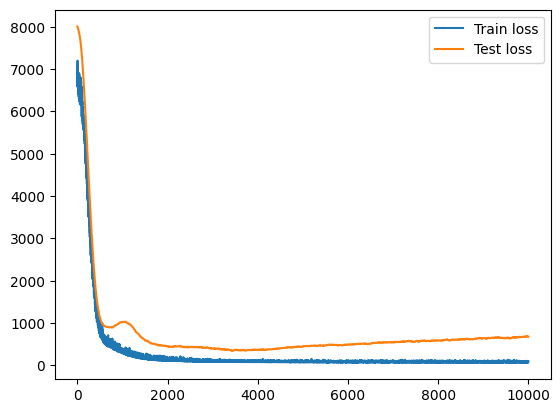

In [54]:
plt.plot(range(num_epochs),losses,label='Train loss')
plt.plot(range(num_epochs),test_losses,label='Test loss')
plt.legend()
plt.show()

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Définir le nombre de couches et le nombre de neurones par couche comme des variables globales
nb_couches = 1
nb_neurones_par_couche = 5

# Créer une classe pour le modèle
class Regressor(nn.Module):
    def __init__(self, input_size):
        super(Regressor, self).__init__()
        layers = []
        for _ in range(nb_couches):
            layers.append(nn.Linear(input_size, nb_neurones_par_couche))
            layers.append(nn.ReLU(inplace=True))
            input_size = nb_neurones_par_couche
        layers.append(nn.Linear(input_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Créer une instance du modèle
input_size = len(X_train_scaled[0])
model = Regressor(input_size)

# Définir la fonction de perte et l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convertir les données en tensors PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(list(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(list(y_test), dtype=torch.float32)

# Créer des DataLoader pour gérer les données
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Entraîner le modèle
num_epochs = 3000
losses=[]
test_losses=[]
for epoch in range(num_epochs):
    i=0
    losses_avg=0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        i+=1
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))  
        losses_avg+=loss.item()
        loss.backward()  
        optimizer.step() 
    losses.append(losses_avg/i)
    
    # Évaluation sur les données de test après chaque époque
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_losses.append(test_loss)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

Epoch [1/3000], Test Loss: 8066.6851
Epoch [2/3000], Test Loss: 8064.1255
Epoch [3/3000], Test Loss: 8061.6216
Epoch [4/3000], Test Loss: 8059.1489
Epoch [5/3000], Test Loss: 8056.6851
Epoch [6/3000], Test Loss: 8054.1855
Epoch [7/3000], Test Loss: 8051.5063
Epoch [8/3000], Test Loss: 8048.7671
Epoch [9/3000], Test Loss: 8046.0093
Epoch [10/3000], Test Loss: 8043.3262
Epoch [11/3000], Test Loss: 8040.6138
Epoch [12/3000], Test Loss: 8037.8613
Epoch [13/3000], Test Loss: 8035.0610
Epoch [14/3000], Test Loss: 8032.2310
Epoch [15/3000], Test Loss: 8029.4219
Epoch [16/3000], Test Loss: 8026.5605
Epoch [17/3000], Test Loss: 8023.4824
Epoch [18/3000], Test Loss: 8020.3887
Epoch [19/3000], Test Loss: 8017.3657
Epoch [20/3000], Test Loss: 8014.3574
Epoch [21/3000], Test Loss: 8011.2700
Epoch [22/3000], Test Loss: 8008.1353
Epoch [23/3000], Test Loss: 8004.9414
Epoch [24/3000], Test Loss: 8001.4888
Epoch [25/3000], Test Loss: 7997.9409
Epoch [26/3000], Test Loss: 7994.3711
Epoch [27/3000], Test

Epoch [237/3000], Test Loss: 4364.4292
Epoch [238/3000], Test Loss: 4344.6118
Epoch [239/3000], Test Loss: 4325.2261
Epoch [240/3000], Test Loss: 4306.5010
Epoch [241/3000], Test Loss: 4287.9243
Epoch [242/3000], Test Loss: 4269.7178
Epoch [243/3000], Test Loss: 4251.0137
Epoch [244/3000], Test Loss: 4233.3770
Epoch [245/3000], Test Loss: 4215.3384
Epoch [246/3000], Test Loss: 4197.0215
Epoch [247/3000], Test Loss: 4178.9204
Epoch [248/3000], Test Loss: 4160.2656
Epoch [249/3000], Test Loss: 4142.0151
Epoch [250/3000], Test Loss: 4123.8560
Epoch [251/3000], Test Loss: 4106.3687
Epoch [252/3000], Test Loss: 4089.1970
Epoch [253/3000], Test Loss: 4072.0896
Epoch [254/3000], Test Loss: 4055.1160
Epoch [255/3000], Test Loss: 4038.2473
Epoch [256/3000], Test Loss: 4021.0554
Epoch [257/3000], Test Loss: 4003.9482
Epoch [258/3000], Test Loss: 3986.5139
Epoch [259/3000], Test Loss: 3967.8142
Epoch [260/3000], Test Loss: 3949.4851
Epoch [261/3000], Test Loss: 3931.1072
Epoch [262/3000], Test Lo

Epoch [450/3000], Test Loss: 1705.7711
Epoch [451/3000], Test Loss: 1697.9286
Epoch [452/3000], Test Loss: 1690.4009
Epoch [453/3000], Test Loss: 1682.7299
Epoch [454/3000], Test Loss: 1675.1246
Epoch [455/3000], Test Loss: 1667.5438
Epoch [456/3000], Test Loss: 1660.3102
Epoch [457/3000], Test Loss: 1653.4249
Epoch [458/3000], Test Loss: 1646.4667
Epoch [459/3000], Test Loss: 1639.2549
Epoch [460/3000], Test Loss: 1632.1967
Epoch [461/3000], Test Loss: 1625.3638
Epoch [462/3000], Test Loss: 1619.0073
Epoch [463/3000], Test Loss: 1612.4808
Epoch [464/3000], Test Loss: 1606.0155
Epoch [465/3000], Test Loss: 1599.4033
Epoch [466/3000], Test Loss: 1592.4677
Epoch [467/3000], Test Loss: 1585.7096
Epoch [468/3000], Test Loss: 1579.2975
Epoch [469/3000], Test Loss: 1572.7587
Epoch [470/3000], Test Loss: 1565.9952
Epoch [471/3000], Test Loss: 1559.6217
Epoch [472/3000], Test Loss: 1554.0713
Epoch [473/3000], Test Loss: 1548.7220
Epoch [474/3000], Test Loss: 1542.7710
Epoch [475/3000], Test Lo

Epoch [682/3000], Test Loss: 1080.3016
Epoch [683/3000], Test Loss: 1082.0526
Epoch [684/3000], Test Loss: 1083.0150
Epoch [685/3000], Test Loss: 1084.0618
Epoch [686/3000], Test Loss: 1085.9381
Epoch [687/3000], Test Loss: 1088.3108
Epoch [688/3000], Test Loss: 1089.8243
Epoch [689/3000], Test Loss: 1091.3184
Epoch [690/3000], Test Loss: 1092.3662
Epoch [691/3000], Test Loss: 1092.6349
Epoch [692/3000], Test Loss: 1092.9406
Epoch [693/3000], Test Loss: 1093.3927
Epoch [694/3000], Test Loss: 1094.2102
Epoch [695/3000], Test Loss: 1095.5415
Epoch [696/3000], Test Loss: 1096.7144
Epoch [697/3000], Test Loss: 1097.5497
Epoch [698/3000], Test Loss: 1096.5428
Epoch [699/3000], Test Loss: 1095.8170
Epoch [700/3000], Test Loss: 1096.1798
Epoch [701/3000], Test Loss: 1096.9883
Epoch [702/3000], Test Loss: 1097.8848
Epoch [703/3000], Test Loss: 1098.1483
Epoch [704/3000], Test Loss: 1098.2767
Epoch [705/3000], Test Loss: 1098.1022
Epoch [706/3000], Test Loss: 1098.1945
Epoch [707/3000], Test Lo

Epoch [932/3000], Test Loss: 1173.2738
Epoch [933/3000], Test Loss: 1173.8363
Epoch [934/3000], Test Loss: 1172.7673
Epoch [935/3000], Test Loss: 1171.1774
Epoch [936/3000], Test Loss: 1171.5804
Epoch [937/3000], Test Loss: 1173.0909
Epoch [938/3000], Test Loss: 1172.9694
Epoch [939/3000], Test Loss: 1172.7903
Epoch [940/3000], Test Loss: 1173.1167
Epoch [941/3000], Test Loss: 1173.8895
Epoch [942/3000], Test Loss: 1174.6890
Epoch [943/3000], Test Loss: 1175.4868
Epoch [944/3000], Test Loss: 1176.4891
Epoch [945/3000], Test Loss: 1176.1343
Epoch [946/3000], Test Loss: 1175.0906
Epoch [947/3000], Test Loss: 1174.8158
Epoch [948/3000], Test Loss: 1174.3615
Epoch [949/3000], Test Loss: 1173.8258
Epoch [950/3000], Test Loss: 1174.1963
Epoch [951/3000], Test Loss: 1174.3972
Epoch [952/3000], Test Loss: 1174.4391
Epoch [953/3000], Test Loss: 1172.9252
Epoch [954/3000], Test Loss: 1171.3010
Epoch [955/3000], Test Loss: 1170.5258
Epoch [956/3000], Test Loss: 1171.0513
Epoch [957/3000], Test Lo

Epoch [1161/3000], Test Loss: 1108.1947
Epoch [1162/3000], Test Loss: 1107.9432
Epoch [1163/3000], Test Loss: 1108.6655
Epoch [1164/3000], Test Loss: 1109.8610
Epoch [1165/3000], Test Loss: 1109.3041
Epoch [1166/3000], Test Loss: 1109.3890
Epoch [1167/3000], Test Loss: 1109.7167
Epoch [1168/3000], Test Loss: 1111.5436
Epoch [1169/3000], Test Loss: 1113.1962
Epoch [1170/3000], Test Loss: 1112.9900
Epoch [1171/3000], Test Loss: 1111.4030
Epoch [1172/3000], Test Loss: 1108.9191
Epoch [1173/3000], Test Loss: 1107.4097
Epoch [1174/3000], Test Loss: 1105.4366
Epoch [1175/3000], Test Loss: 1102.5682
Epoch [1176/3000], Test Loss: 1098.9050
Epoch [1177/3000], Test Loss: 1094.1163
Epoch [1178/3000], Test Loss: 1090.3541
Epoch [1179/3000], Test Loss: 1087.3431
Epoch [1180/3000], Test Loss: 1085.2209
Epoch [1181/3000], Test Loss: 1083.6924
Epoch [1182/3000], Test Loss: 1081.7432
Epoch [1183/3000], Test Loss: 1080.9738
Epoch [1184/3000], Test Loss: 1079.8459
Epoch [1185/3000], Test Loss: 1078.2543


Epoch [1373/3000], Test Loss: 923.3277
Epoch [1374/3000], Test Loss: 922.0862
Epoch [1375/3000], Test Loss: 921.9838
Epoch [1376/3000], Test Loss: 921.5532
Epoch [1377/3000], Test Loss: 918.7625
Epoch [1378/3000], Test Loss: 916.4142
Epoch [1379/3000], Test Loss: 912.3127
Epoch [1380/3000], Test Loss: 909.5245
Epoch [1381/3000], Test Loss: 908.3281
Epoch [1382/3000], Test Loss: 908.2952
Epoch [1383/3000], Test Loss: 906.0891
Epoch [1384/3000], Test Loss: 903.7112
Epoch [1385/3000], Test Loss: 900.7448
Epoch [1386/3000], Test Loss: 899.5598
Epoch [1387/3000], Test Loss: 899.5966
Epoch [1388/3000], Test Loss: 897.7529
Epoch [1389/3000], Test Loss: 897.4040
Epoch [1390/3000], Test Loss: 897.6802
Epoch [1391/3000], Test Loss: 897.7678
Epoch [1392/3000], Test Loss: 898.5833
Epoch [1393/3000], Test Loss: 900.9984
Epoch [1394/3000], Test Loss: 901.7088
Epoch [1395/3000], Test Loss: 898.5026
Epoch [1396/3000], Test Loss: 894.2687
Epoch [1397/3000], Test Loss: 892.0917
Epoch [1398/3000], Test L

Epoch [1606/3000], Test Loss: 750.1873
Epoch [1607/3000], Test Loss: 748.8940
Epoch [1608/3000], Test Loss: 747.9331
Epoch [1609/3000], Test Loss: 748.5994
Epoch [1610/3000], Test Loss: 749.7774
Epoch [1611/3000], Test Loss: 749.8876
Epoch [1612/3000], Test Loss: 750.2828
Epoch [1613/3000], Test Loss: 749.8056
Epoch [1614/3000], Test Loss: 749.6423
Epoch [1615/3000], Test Loss: 750.5989
Epoch [1616/3000], Test Loss: 748.0402
Epoch [1617/3000], Test Loss: 742.9541
Epoch [1618/3000], Test Loss: 735.6628
Epoch [1619/3000], Test Loss: 729.4361
Epoch [1620/3000], Test Loss: 724.5188
Epoch [1621/3000], Test Loss: 721.6348
Epoch [1622/3000], Test Loss: 720.4138
Epoch [1623/3000], Test Loss: 719.7017
Epoch [1624/3000], Test Loss: 718.0515
Epoch [1625/3000], Test Loss: 717.0184
Epoch [1626/3000], Test Loss: 714.3342
Epoch [1627/3000], Test Loss: 711.7823
Epoch [1628/3000], Test Loss: 709.5748
Epoch [1629/3000], Test Loss: 707.9337
Epoch [1630/3000], Test Loss: 707.3015
Epoch [1631/3000], Test L

Epoch [1846/3000], Test Loss: 582.0036
Epoch [1847/3000], Test Loss: 585.1491
Epoch [1848/3000], Test Loss: 586.8560
Epoch [1849/3000], Test Loss: 588.1866
Epoch [1850/3000], Test Loss: 588.8904
Epoch [1851/3000], Test Loss: 588.7620
Epoch [1852/3000], Test Loss: 588.1022
Epoch [1853/3000], Test Loss: 588.7945
Epoch [1854/3000], Test Loss: 590.6176
Epoch [1855/3000], Test Loss: 591.1133
Epoch [1856/3000], Test Loss: 591.1973
Epoch [1857/3000], Test Loss: 590.9935
Epoch [1858/3000], Test Loss: 589.7398
Epoch [1859/3000], Test Loss: 588.2188
Epoch [1860/3000], Test Loss: 586.2531
Epoch [1861/3000], Test Loss: 584.7224
Epoch [1862/3000], Test Loss: 583.6310
Epoch [1863/3000], Test Loss: 583.4164
Epoch [1864/3000], Test Loss: 583.3629
Epoch [1865/3000], Test Loss: 581.9662
Epoch [1866/3000], Test Loss: 581.5981
Epoch [1867/3000], Test Loss: 581.5182
Epoch [1868/3000], Test Loss: 580.0098
Epoch [1869/3000], Test Loss: 577.7297
Epoch [1870/3000], Test Loss: 575.9980
Epoch [1871/3000], Test L

Epoch [2111/3000], Test Loss: 427.2077
Epoch [2112/3000], Test Loss: 424.1084
Epoch [2113/3000], Test Loss: 422.1003
Epoch [2114/3000], Test Loss: 420.8463
Epoch [2115/3000], Test Loss: 420.2503
Epoch [2116/3000], Test Loss: 419.1601
Epoch [2117/3000], Test Loss: 418.6767
Epoch [2118/3000], Test Loss: 418.3060
Epoch [2119/3000], Test Loss: 418.3979
Epoch [2120/3000], Test Loss: 417.7624
Epoch [2121/3000], Test Loss: 416.8800
Epoch [2122/3000], Test Loss: 417.1735
Epoch [2123/3000], Test Loss: 417.4869
Epoch [2124/3000], Test Loss: 418.2233
Epoch [2125/3000], Test Loss: 418.1470
Epoch [2126/3000], Test Loss: 416.4131
Epoch [2127/3000], Test Loss: 414.5691
Epoch [2128/3000], Test Loss: 413.2710
Epoch [2129/3000], Test Loss: 413.2798
Epoch [2130/3000], Test Loss: 413.2308
Epoch [2131/3000], Test Loss: 412.0365
Epoch [2132/3000], Test Loss: 410.6932
Epoch [2133/3000], Test Loss: 409.3044
Epoch [2134/3000], Test Loss: 408.1821
Epoch [2135/3000], Test Loss: 407.6674
Epoch [2136/3000], Test L

Epoch [2368/3000], Test Loss: 284.2487
Epoch [2369/3000], Test Loss: 284.9999
Epoch [2370/3000], Test Loss: 285.8098
Epoch [2371/3000], Test Loss: 286.5494
Epoch [2372/3000], Test Loss: 287.4660
Epoch [2373/3000], Test Loss: 287.3735
Epoch [2374/3000], Test Loss: 287.3493
Epoch [2375/3000], Test Loss: 287.9446
Epoch [2376/3000], Test Loss: 287.7063
Epoch [2377/3000], Test Loss: 287.6132
Epoch [2378/3000], Test Loss: 287.6249
Epoch [2379/3000], Test Loss: 287.1429
Epoch [2380/3000], Test Loss: 285.4252
Epoch [2381/3000], Test Loss: 283.2751
Epoch [2382/3000], Test Loss: 282.4659
Epoch [2383/3000], Test Loss: 282.1162
Epoch [2384/3000], Test Loss: 280.9335
Epoch [2385/3000], Test Loss: 279.6725
Epoch [2386/3000], Test Loss: 277.2316
Epoch [2387/3000], Test Loss: 275.9646
Epoch [2388/3000], Test Loss: 275.1764
Epoch [2389/3000], Test Loss: 274.5113
Epoch [2390/3000], Test Loss: 274.0171
Epoch [2391/3000], Test Loss: 274.1749
Epoch [2392/3000], Test Loss: 273.1174
Epoch [2393/3000], Test L

Epoch [2584/3000], Test Loss: 211.2476
Epoch [2585/3000], Test Loss: 211.2625
Epoch [2586/3000], Test Loss: 211.3568
Epoch [2587/3000], Test Loss: 211.5253
Epoch [2588/3000], Test Loss: 212.0967
Epoch [2589/3000], Test Loss: 211.4466
Epoch [2590/3000], Test Loss: 210.6386
Epoch [2591/3000], Test Loss: 210.1320
Epoch [2592/3000], Test Loss: 210.0339
Epoch [2593/3000], Test Loss: 210.6728
Epoch [2594/3000], Test Loss: 211.2067
Epoch [2595/3000], Test Loss: 211.5463
Epoch [2596/3000], Test Loss: 212.0821
Epoch [2597/3000], Test Loss: 212.2727
Epoch [2598/3000], Test Loss: 212.8185
Epoch [2599/3000], Test Loss: 213.3382
Epoch [2600/3000], Test Loss: 213.3864
Epoch [2601/3000], Test Loss: 213.1802
Epoch [2602/3000], Test Loss: 212.5006
Epoch [2603/3000], Test Loss: 210.8264
Epoch [2604/3000], Test Loss: 207.8693
Epoch [2605/3000], Test Loss: 206.3231
Epoch [2606/3000], Test Loss: 205.5142
Epoch [2607/3000], Test Loss: 205.2894
Epoch [2608/3000], Test Loss: 204.9830
Epoch [2609/3000], Test L

Epoch [2796/3000], Test Loss: 163.9879
Epoch [2797/3000], Test Loss: 164.1956
Epoch [2798/3000], Test Loss: 163.4050
Epoch [2799/3000], Test Loss: 163.0703
Epoch [2800/3000], Test Loss: 162.0875
Epoch [2801/3000], Test Loss: 160.8528
Epoch [2802/3000], Test Loss: 160.3707
Epoch [2803/3000], Test Loss: 160.4868
Epoch [2804/3000], Test Loss: 159.5098
Epoch [2805/3000], Test Loss: 159.0652
Epoch [2806/3000], Test Loss: 158.9787
Epoch [2807/3000], Test Loss: 158.4933
Epoch [2808/3000], Test Loss: 158.2768
Epoch [2809/3000], Test Loss: 158.5821
Epoch [2810/3000], Test Loss: 158.7520
Epoch [2811/3000], Test Loss: 159.4720
Epoch [2812/3000], Test Loss: 160.0631
Epoch [2813/3000], Test Loss: 160.0726
Epoch [2814/3000], Test Loss: 159.9983
Epoch [2815/3000], Test Loss: 159.4278
Epoch [2816/3000], Test Loss: 159.1608
Epoch [2817/3000], Test Loss: 159.2820
Epoch [2818/3000], Test Loss: 158.9416
Epoch [2819/3000], Test Loss: 158.4167
Epoch [2820/3000], Test Loss: 157.8940
Epoch [2821/3000], Test L

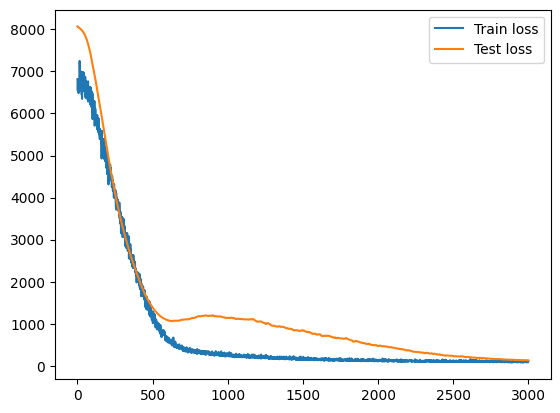

In [56]:
plt.plot(range(num_epochs),losses,label='Train loss')
plt.plot(range(num_epochs),test_losses,label='Test loss')
plt.legend()
plt.show()

In [64]:
#enregister best model (voir tp dalas)
#rajouter le test avec tanh
#print le lime pour plusieurs pays

In [57]:
feature_names=list(X_train.columns)

In [62]:
import lime
import lime.lime_tabular

# Définir la fonction predict_wrapper
def predict_wrapper(x):
    x = torch.tensor(x, dtype=torch.float32)
    return model(x).detach().numpy()

# Créer un objet explainer Lime
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, 
                                                   mode="regression",
                                                   training_labels=y_train,
                                                   feature_names=feature_names)

# Sélectionner un échantillon de données de test pour expliquer
sample_idx = 0
sample = X_test_scaled[sample_idx]

# Générer une explication pour l'échantillon sélectionné
exp = explainer.explain_instance(sample, predict_wrapper, num_features=len(feature_names))

# Afficher les résultats de l'explication
exp.show_in_notebook()

In [23]:
df.loc[y_test.index]

,Country,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Annee_Souverainete,Nb_Univtop500,Mean_Rank_Univ,Political_Regime,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,...,Averageiqbycountry_Iqlynnbecker2019,Averageiqbycountry_Sourcelynnbecker2019,Averageiq_Ici2017Grade,Averageiq_Ici2017Score,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
132,Norway,4.448148,3080.222222,14.0,1945.0,3.0,230.0,3.0,852238.0,191392.0,...,97.13,T,B+,55.0,NaN,NaN,NaN,92240.474893,1167.600948,4.276
7,Armenia,4.703704,223.592593,1.0,1990.0,0.0,NaN,2.0,190349.0,958190.0,...,88.82,E,C-,29.6,NaN,NaN,NaN,4991.571073,146.810914,NaN
67,Greece,4.659259,6808.481481,2.0,1822.0,2.0,396.0,2.0,1340456.0,1088507.0,...,90.77,T,B-,40.1,552.0,510.0,543.0,20587.846462,101.920032,3.499
111,Mauritania,3.750000,67.000000,0.0,1960.0,0.0,NaN,1.0,182286.0,130226.0,...,59.76,E,D-,11.6,482.0,487.0,494.0,1947.268939,30.426077,NaN
15,Belarus,4.592308,1401.307692,3.0,1990.0,1.0,387.0,1.0,1067090.0,1483626.0,...,101.60,T,NaN,NaN,442.0,429.0,446.0,7550.196258,222.064596,NaN
76,Hungary,4.544444,3538.666667,15.0,1991.0,0.0,NaN,1.0,584567.0,714420.0,...,99.24,T,B,50.0,414.0,411.0,417.0,18883.037994,572.213273,12.605
112,Mauritius,4.284615,338.615385,0.0,1968.0,0.0,NaN,2.0,28893.0,182973.0,...,86.56,T,C,31.7,508.0,483.0,503.0,9096.355431,162.434918,NaN
107,Maldives,3.975000,99.000000,0.0,1965.0,0.0,NaN,2.0,70079.0,3715.0,...,80.54,E,NaN,NaN,NaN,NaN,NaN,10031.494311,170.025327,NaN
78,India,4.440741,24853.740741,10.0,1947.0,11.0,311.0,1.0,4878704.0,17869492.0,...,76.24,T,C-,29.4,406.0,405.0,403.0,2222.951224,28.869496,NaN
16,Belgium,4.481481,7887.962963,11.0,1830.0,7.0,217.0,3.0,2005479.0,577463.0,...,97.49,T,A-,58.7,417.0,404.0,421.0,51408.383926,264.991670,10.043
